In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression

In [5]:
# Create synthetic regression data (extra noise + irrelevant features for feature selection test)
X, y = make_regression(n_samples=200, n_features=15, noise=20, random_state=42)

In [7]:
# Polynomial expansion to simulate high dimensionality
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

In [11]:
# Scaling for stability
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [15]:
# Train Ridge & Lasso with moderate alpha
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.1, max_iter=500000, tol=0.1)

ridge.fit(X_poly_scaled, y)
lasso.fit(X_poly_scaled, y)

Lasso(alpha=0.1, max_iter=500000, tol=0.1)

In [21]:
# Compare coefficients
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_

In [25]:
# Lasso Feature Selection: Find eliminated features
selected_features_lasso = np.where(lasso_coefs != 0)[0]
eliminated_features_lasso = np.where(lasso_coefs == 0)[0]

print(" Ridge - Number of non-zero coefficients:", np.sum(ridge_coefs != 0))
print(" Lasso - Number of non-zero coefficients:", np.sum(lasso_coefs != 0))
print(" Lasso eliminated features indices:", eliminated_features_lasso)



 Ridge - Number of non-zero coefficients: 815
 Lasso - Number of non-zero coefficients: 710
 Lasso eliminated features indices: [ 24  32  38  41  44 118 159 165 185 187 215 226 229 237 253 255 258 266
 288 290 300 310 313 314 344 362 372 379 383 388 406 420 429 434 441 452
 454 455 458 461 476 480 492 496 499 503 508 520 528 530 538 541 551 559
 567 569 570 580 592 600 601 604 605 616 621 626 628 630 637 645 655 656
 659 667 670 680 681 688 707 708 711 715 716 717 718 721 729 730 734 737
 738 752 756 765 769 773 776 779 784 787 788 797 799 804 810]


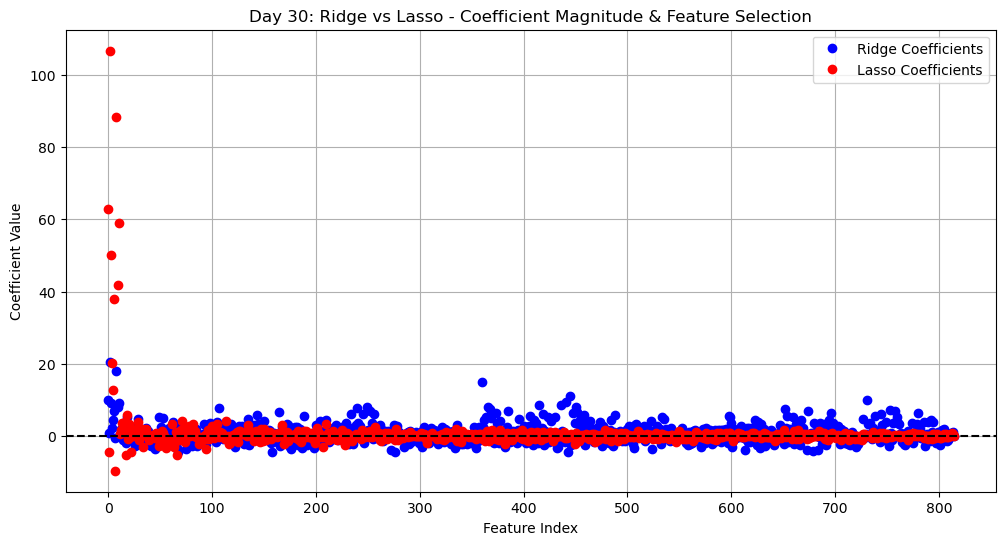

In [27]:
# Visualization of coefficient magnitudes
plt.figure(figsize=(12,6))
plt.plot(ridge_coefs, 'bo', label="Ridge Coefficients")
plt.plot(lasso_coefs, 'ro', label="Lasso Coefficients")
plt.axhline(0, color='black', linestyle='--')
plt.title("Day 30: Ridge vs Lasso - Coefficient Magnitude & Feature Selection")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()